In [1]:
import pandas as pd
data = pd.read_csv("./data/finalTrain_new2.csv")

In [2]:
data.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source,classes
0,41,f,f,1.30,t,2.50,t,125,109,SVHC,1
1,23,f,f,4.10,t,2.00,t,102,110,other,1
2,46,f,f,0.98,t,2.02,t,109,120,other,1
3,70,t,f,0.16,t,1.90,t,175,110,other,1
4,70,f,f,0.72,t,1.20,t,61,70,SVI,1


In [3]:
on_thyroxine_categories = ['f','t']
goitre_categories = ['f','t']
TSH_measured_categories = ['f','t']
TT4_measured_categories = ['f','t']
referral_source_categories = ['SVHC','other','SVI','STMW','SVHD']

In [4]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
# Define numerical columns and categorical features with ordinal encoding
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'FTI']
ordinal_encoded_features = ['on_thyroxine', 'goitre', 'TSH_measured', 'TT4_measured', 'referral_source']
ordinal_categories = [on_thyroxine_categories, goitre_categories, TSH_measured_categories, TT4_measured_categories, referral_source_categories]

# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinal Encoded Pipeline
ordinal_encoded_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories)),
    ('scaler', StandardScaler())
])

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_cols),
    ('ordinal_encoded_pipeline', ordinal_encoded_pipeline, ordinal_encoded_features)
])

In [6]:
# Train-test split
X = data.drop('classes', axis=1)
y = data['classes']

In [7]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [8]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.985

[Text(0.4583333333333333, 0.9666666666666667, 'x[1] <= 0.075\ngini = 0.151\nsamples = 1866\nvalue = [108, 1715, 41, 2]'),
 Text(0.2222222222222222, 0.9, 'x[3] <= -2.355\ngini = 0.002\nsamples = 1682\nvalue = [0, 1680, 0, 2]'),
 Text(0.1111111111111111, 0.8333333333333334, 'x[2] <= 2.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1]'),
 Text(0.05555555555555555, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.16666666666666666, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.3333333333333333, 0.8333333333333334, 'x[4] <= -1.733\ngini = 0.001\nsamples = 1680\nvalue = [0, 1679, 0, 1]'),
 Text(0.2777777777777778, 0.7666666666666667, 'x[0] <= -0.021\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 1]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.3888888888888889, 0.7666666666666667, 'gini = 0.0\nsamples = 1677\

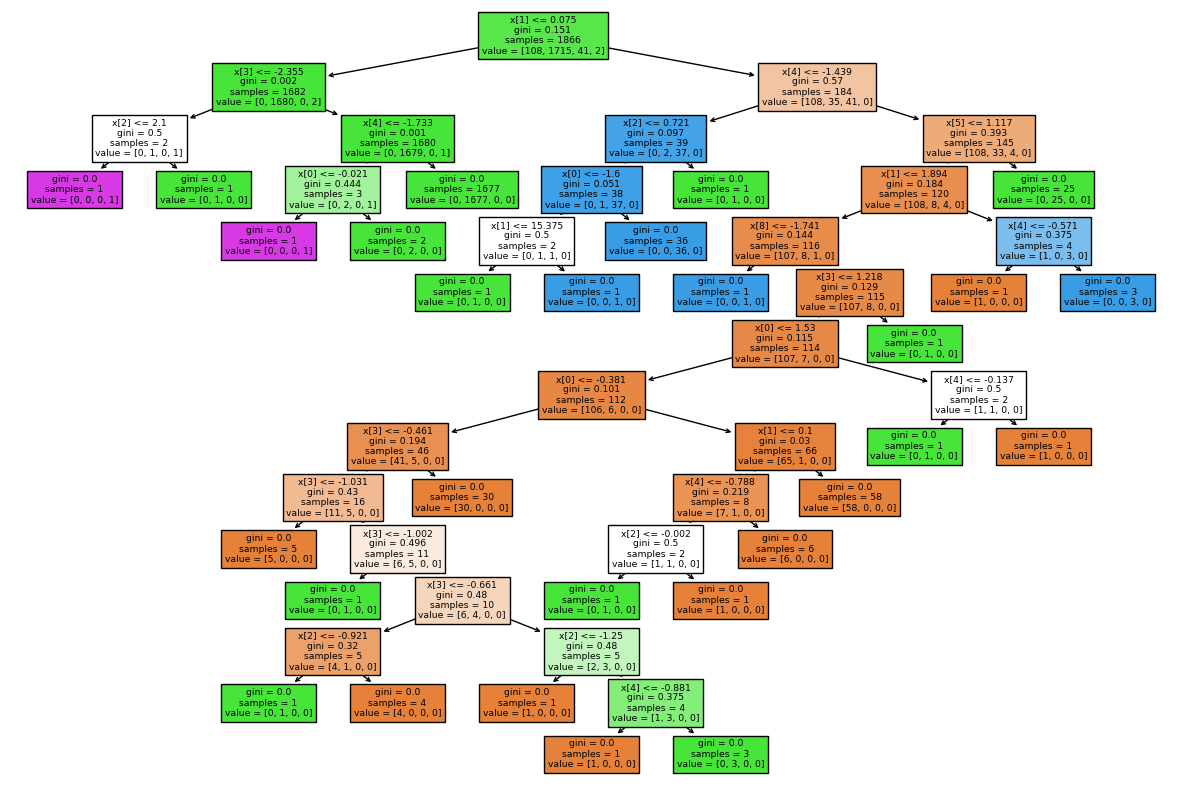

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [14]:
from sklearn.metrics import accuracy_score,classification_report
# Model training score
print(f"Model Score : {model.score(X_train,y_train)}")

#model prediction
y_pred = model.predict(X_test)

# Accuacy Score
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

#Classification Report
print(f"Classification Report : \n {classification_report(y_test,y_pred)}")

Model Score : 1.0
Accuracy Score : 0.985
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        39
           1       0.99      0.99      0.99       740
           2       0.88      1.00      0.93        21
           3       0.00      0.00      0.00         0

    accuracy                           0.98       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.99      0.98      0.99       800



d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavi

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

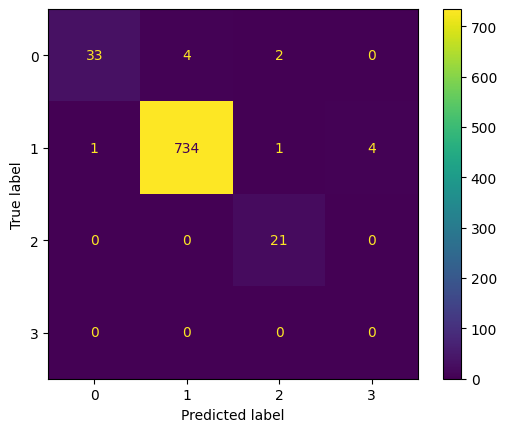

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

## Pre Prunning

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 8],
    'min_samples_split': [2, 3, 4, 5, 7],
    'min_samples_leaf': [1, 2, 3, 5]
}

In [19]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [20]:
grid_search.fit(X_train,y_train)

d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5, 7]})

In [21]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [22]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [23]:
model_2=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=3)

In [24]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3)

In [25]:
y_pred=model_2.predict(X_test)

In [26]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9925


In [27]:
from sklearn.metrics import accuracy_score,classification_report
# Model training score
print(f"Model Score : {model_2.score(X_train,y_train)}")

#model prediction
y_pred = model_2.predict(X_test)

# Accuacy Score
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

#Classification Report
print(f"Classification Report : \n {classification_report(y_test,y_pred)}")

Model Score : 0.9914255091103966
Accuracy Score : 0.9925
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        39
           1       1.00      0.99      1.00       740
           2       0.95      0.90      0.93        21

    accuracy                           0.99       800
   macro avg       0.95      0.97      0.95       800
weighted avg       0.99      0.99      0.99       800



[Text(0.4230769230769231, 0.875, 'x[1] <= 0.075\ngini = 0.151\nsamples = 1866\nvalue = [108, 1715, 41, 2]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= -2.355\ngini = 0.002\nsamples = 1682\nvalue = [0, 1680, 0, 2]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[4] <= -1.733\ngini = 0.001\nsamples = 1680\nvalue = [0, 1679, 0, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 1]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 1677\nvalue = [0, 1677, 0, 0]'),
 Text(0.6923076923076923, 0.625, 'x[4] <= -1.439\ngini = 0.57\nsamples = 184\nvalue = [108, 35, 41, 0]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 0.458\ngini = 0.097\nsamples = 39\nvalue = [0, 2, 37, 0]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]'),
 Text(0.8461538461538461, 0.375, 'x[5

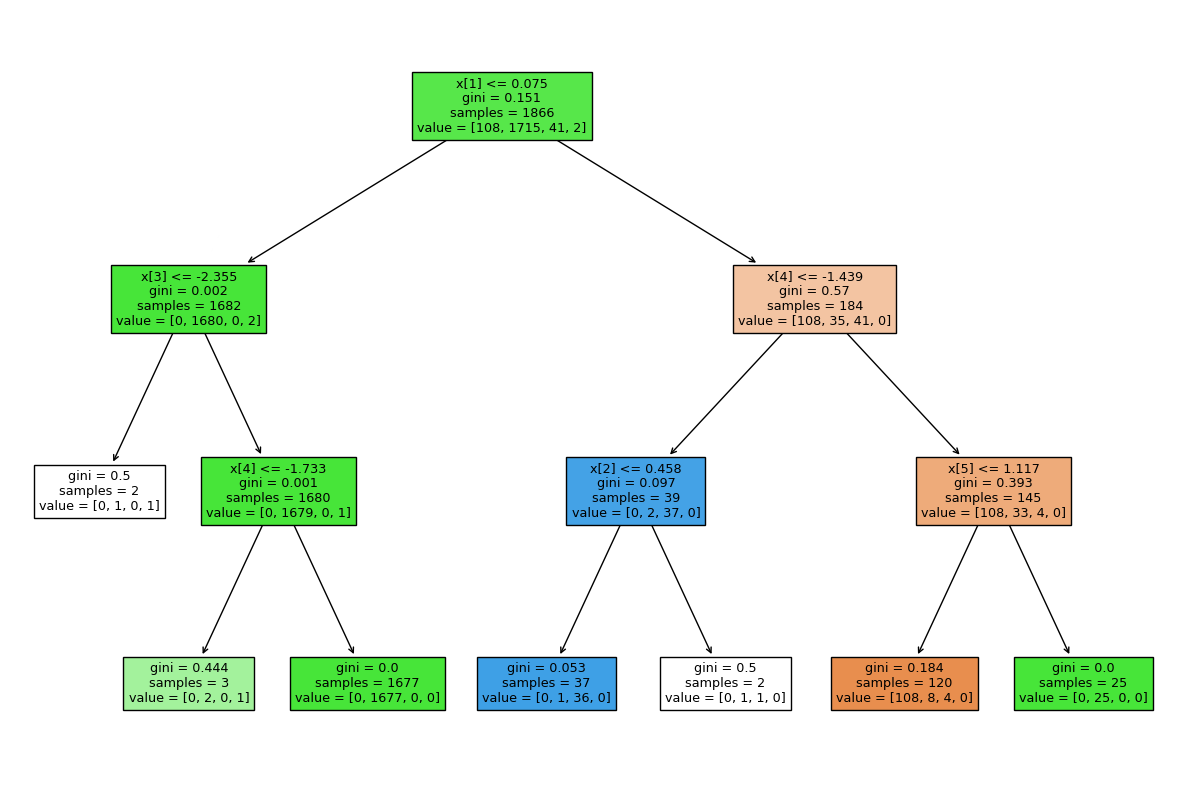

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_2,filled=True)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

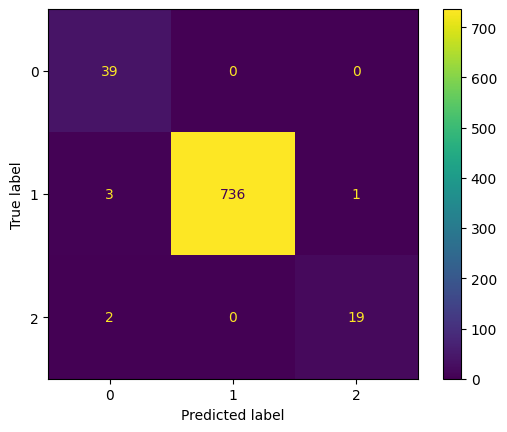

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()